<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Week 3, Day 2</h1>
<h3>Grover´s Algorithm</h3>

</div>

In [1]:
#import libraries

from qiskit import QuantumCircuit, execute, Aer, IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import array_to_latex

from qiskit.providers.ibmq import least_busy

from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.utils import QuantumInstance


print("Libraries imported successfully.")

Libraries imported successfully.


## Coding cheat sheet:

#Defining a quantum circuit: 

`qc = QuantumCircuit(1)` #Define a 1 qubit quantum circuit <br>

`qc.x(0)` #Add an X gate <br>
`qc.h(0)` #Add an H gate <br>
`qc.z(0)` #Add a Z gate <br>
`qc.y(0)` #Add a Y gate <br>

`qc.draw()` #Draw the circuit <br>

**Using the statevector simulator** (Do this no matter which way you want to see the output):<br>

`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>


See the output on the Bloch sphere:<br>
`state = result.get_statevector()` <br>
`plot_bloch_multivector(state)`<br>

See the output in vector form:<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form: <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

**Using the qasm simulator:**

`svsim = Aer.get_backend('qasm_simulator')` # Change statevector to qasm <br>
`job = execute(qc,svsim,shots=100)` # add shots - tell it how many times to run <br>
`result = job.result()` <br>


**Using a real quantum computer:**

Find the least busy backend: <br>
`IBMQ.load_account()` <br>
`provider = IBMQ.get_provider(hub='ibm-q')` <br>
`backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))` <br>
`print("least busy backend: ", backend)` <br>


Run the job:
`job = execute(qc, backend=backend, shots=100)`

`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 





<a id="2qubits"></a>
# Implementing Grover's Algorithm for 2 qubits

## Step 1 - Creating an equal superposition

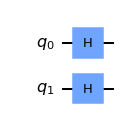

In [2]:
#BLOCK 1 - Define a quantum circuit with 2 qubits and create an equal superposition
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw()



<a id="hgates"></a>
## Step 2 - Applying the Oracle

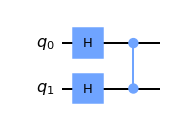

In [34]:
# BLOCK 2 - Apply the Oracle


qc.cz(0,1)
qc.draw()


In [35]:
# BLOCK 3 - Check to make sure you got the right statevector

svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

#See the output in vector form:
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

<a id="oracle2q"></a>
## Step 3: Applying Grover's diffusion operator

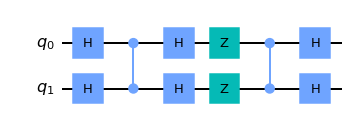

In [36]:
# BLOCK 4 - Applying the diffusion operator
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.draw()

In [37]:
# BLOCK 5 - Find the statevector to make sure you implemented all the gates correctly.
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

#See the output in vector form:
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

<a id="measurement"></a>
## Step 4 - Make a measurement

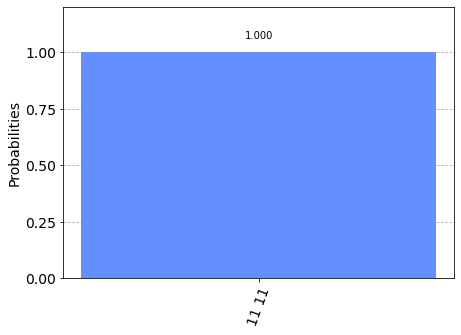

In [41]:
# BLOCK 6 - Use the qasm simulator to find the output
qc.draw()
qc.measure_all()


svsim = Aer.get_backend('qasm_simulator') # Change statevector to qasm
job = execute(qc,svsim,shots=100) # add shots - tell it how many times to run
result = job.result()

result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts) 

# Part 2 - Running Grover's Algorithm for many items

In [43]:
# BLOCK 7 - Define the list of items
items = '00100000'


In [44]:
# BLOCK 8 - Create the oracle

oracle = TruthTableOracle(items)

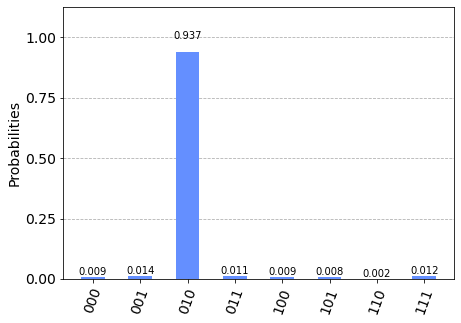

In [53]:
# BLOCK 9 - Call the Grover function and visualize result

grover = Grover(oracle, iterations = 10)

result = grover.run(QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement'])


<a id="real"></a>
## Part 3 - Experimenting with a real quantum computer

We can run the circuit on a quantum computer as below.

In [54]:
# BLOCK 10 - Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


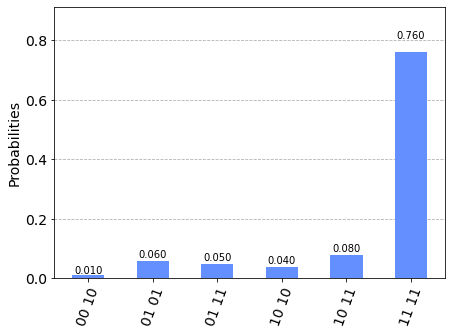

In [62]:
# BLOCK 11 - Run our circuit on the least busy backend

result= grover.run(QuantumInstance(backend, shots=1024))

job = execute(qc, backend=backend, shots=100)

result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts) 




In [63]:
# BLOCK 12 - Get the results from the computation

plot_histogram(result['measurement'])




Traceback (most recent call last):
  File "<ipython-input-63-cdfd2c48b7a9>", line 3, in <module>
    plot_histogram(result['measurement'])
TypeError: 'Result' object is not subscriptable

Use %tb to get the full traceback.
